In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

In [8]:
# datasets
trainset = torchvision.datasets.FashionMNIST('./Data',
            download=True, train=True, transform=transform)

testset = torchvision.datasets.FashionMNIST('./Data', 
            download=True, train=False, transform = transform)

In [9]:
# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                         shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=True, num_workers=2)

In [10]:
# class labels
classes = ('T-shirt/tio', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sanal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [11]:
# helper function to show an image
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5  # unnormalise
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [13]:
# model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

net = Net()

In [15]:
# hyperparameters
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 1. Tensorboard setup

In [25]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('runs/fashion_mnist_experiment_1')

# 2. Writing to Tensorboard

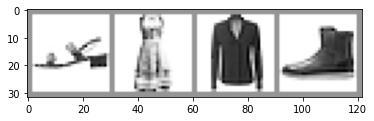

In [27]:
# get random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to Tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

In [34]:
! tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.
W0408 03:59:12.733866 140356236977920 plugin_event_accumulator.py:323] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0408 03:59:12.734089 140356236977920 plugin_event_accumulator.py:362] Found more than one "run metadata" event with tag step1. Overwriting it with the newest event.
W0408 03:59:12.735837 140356236977920 plugin_event_accumulator.py:323] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0408 03:59:12.735970 140356236977920 plugin_event_accumulator.py:362] Found more than one "run metadata" event with tag step1. Overwriting it with the newest event.
W0408 03:59:12.737852 140356236977920 plugin_event_accumulator.py:323] Found more than one graph event per run

# 3. Inspect the model

In [33]:
writer.add_graph(net, images)
writer.close()